In [1]:
from sklearn.model_selection import StratifiedKFold  # Cross Validation
from sklearn.preprocessing import StandardScaler # Normalizacion de los datos (media=0, std=1)
from sklearn.cluster import KMeans # Clusters
import seaborn as sns # Visualize
import matplotlib.pyplot as plt # Visualize
import statistics as st #moda
import pandas as pd
import numpy as np

In [3]:
columns = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry','length_groove','class']
df = pd.read_csv('seeds_dataset.txt', names=columns, delimiter='\s+')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,length_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
X = df[columns[:-1]]
X

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,length_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [4]:
# Standarize Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Labels
labels = df['class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: class, Length: 210, dtype: int64

In [5]:
K = 10
Kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)

min_clusters = 3
max_clusters = 50

#Columnas del DataFrame por cada nº de cluster correspondiente
num_clusters = [i for i in range(min_clusters, max_clusters+1)]

# DataFrame que contendra las tasas de acierto para cada numero de clusters y por particion
final = pd.DataFrame(np.zeros((K,(max_clusters-min_clusters)+1))-1, columns=num_clusters)
final.columns.name = "Clusters"
final

Clusters,3,4,5,6,7,8,9,10,11,12,...,41,42,43,44,45,46,47,48,49,50
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
cont = 0
for i in range(min_clusters, max_clusters+1):
    model = KMeans(n_clusters=i, random_state=0)
    acc = []
    
    for data_train, data_test in Kfold.split(X_std, labels):
        #Obtenemos muestras de entrenamiento
        train = X_std[data_train]
        labels_train = labels[data_train]
        
        #Obtenemos muestras para test
        test = X_std[data_test]
        labels_test = labels[data_test]
        
        #Entrenamos al modelo
        model.fit(train)
        
        #Obtenemos etiquetas
        clusters = model.labels_
                
        #predecimos según el modelo
        y_predict = model.predict(test)
        
        #Clasificacion por Moda
        moda = -1 + np.zeros((i), dtype=int)
        aciertos = 0
        
        # Computo de la moda y numero de aciertos
        for c in range(i):
            # Obtenemos la clase mayoritaria del cluster mediante el metodo st.mode
            moda[c] = st.mode(labels_train[clusters==c])
            aciertos += np.sum(labels_test[y_predict==c] == moda[c])
            
                        
        accuracy = (aciertos / labels_test.shape[0])          
        acc.append(accuracy)
   
    # Escribimos en el DataFrame las accuracy obtenidas para cada particion por numero de clusters
    final.loc[:,final.keys()[cont]] = acc
    cont += 1
final

Clusters,3,4,5,6,7,8,9,10,11,12,...,41,42,43,44,45,46,47,48,49,50
0,0.904762,0.809524,0.809524,0.857143,0.857143,0.904762,0.857143,0.904762,0.904762,0.904762,...,0.857143,0.904762,0.904762,0.904762,0.952381,0.904762,0.952381,0.904762,0.857143,0.904762
1,0.904762,0.857143,1.000000,0.952381,1.000000,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,0.904762,0.952381,0.904762,0.904762,0.952381,0.952381,0.904762,0.904762,0.904762
2,0.857143,0.857143,0.809524,0.857143,0.857143,0.857143,0.857143,0.857143,0.952381,0.857143,...,0.904762,0.904762,0.857143,0.952381,0.904762,0.952381,0.904762,0.904762,0.952381,0.952381
3,0.904762,1.000000,0.952381,0.904762,1.000000,0.904762,0.904762,0.904762,0.952381,0.952381,...,0.952381,0.952381,0.952381,0.952381,1.000000,0.952381,0.952381,0.904762,0.952381,0.904762
4,0.904762,0.857143,0.904762,0.904762,0.904762,0.904762,0.904762,0.952381,0.952381,0.952381,...,1.000000,0.952381,0.952381,0.952381,0.904762,1.000000,1.000000,1.000000,0.952381,1.000000
5,1.000000,0.952381,0.809524,0.857143,0.952381,0.809524,0.857143,0.904762,0.857143,0.857143,...,1.000000,0.952381,0.857143,1.000000,1.000000,0.952381,0.952381,1.000000,1.000000,1.000000
6,0.666667,0.809524,0.809524,0.761905,0.761905,0.714286,0.857143,0.761905,0.714286,0.761905,...,0.761905,0.761905,0.761905,0.714286,0.761905,0.761905,0.761905,0.809524,0.761905,0.761905
7,1.000000,0.952381,0.904762,0.952381,0.952381,1.000000,1.000000,0.952381,0.904762,0.904762,...,0.952381,0.857143,0.857143,0.761905,0.904762,0.809524,0.952381,0.857143,0.952381,0.857143
8,0.952381,0.952381,0.857143,0.904762,0.952381,0.904762,0.809524,0.857143,0.904762,0.952381,...,0.952381,0.904762,0.809524,0.904762,0.904762,0.952381,1.000000,0.952381,1.000000,0.952381
9,0.857143,0.761905,0.952381,0.809524,0.904762,0.904762,0.952381,0.809524,0.904762,1.000000,...,0.904762,1.000000,0.952381,0.952381,0.904762,0.904762,0.904762,0.857143,1.000000,0.952381


In [7]:
final.mean()

Clusters
3     0.895238
4     0.880952
5     0.880952
6     0.876190
7     0.914286
8     0.885714
9     0.895238
10    0.890476
11    0.904762
12    0.914286
13    0.885714
14    0.909524
15    0.866667
16    0.904762
17    0.895238
18    0.900000
19    0.895238
20    0.895238
21    0.890476
22    0.895238
23    0.900000
24    0.904762
25    0.909524
26    0.900000
27    0.904762
28    0.895238
29    0.909524
30    0.890476
31    0.880952
32    0.904762
33    0.895238
34    0.876190
35    0.895238
36    0.909524
37    0.890476
38    0.890476
39    0.900000
40    0.923810
41    0.928571
42    0.909524
43    0.885714
44    0.900000
45    0.914286
46    0.914286
47    0.933333
48    0.909524
49    0.933333
50    0.919048
dtype: float64

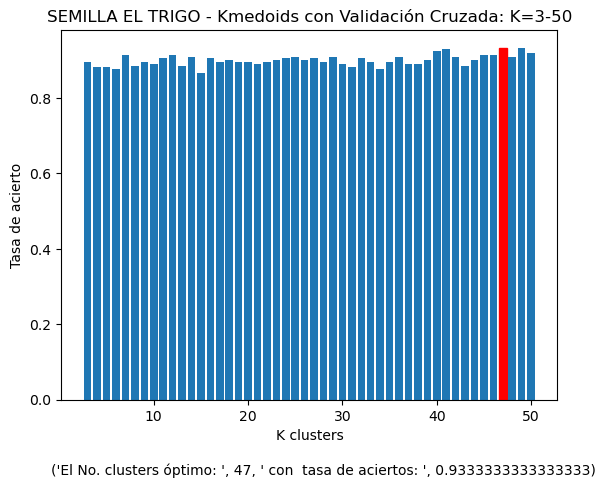

In [8]:
x = num_clusters
y = final.mean()
cluster_optimo = final.columns[final.mean(axis=0).argmax()]
tasa_acierto = final.mean(axis=0).max()

frase = 'El No. clusters óptimo: ',cluster_optimo,' con  tasa de aciertos: ',tasa_acierto

#Plot
fig = plt.figure()
bars = plt.bar(x,y)
bars[cluster_optimo-3].set_color("red")

#Text
plt.title("SEMILLA EL TRIGO - Kmedoids con Validación Cruzada: K=3-50")
plt.xlabel("K clusters")
plt.ylabel("Tasa de acierto")
plt.text(28, -0.2, frase, ha='center')

plt.show()